### Assignment 2 - Linear Regression

In [2]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The dataset is based on Gyódi and Nawaro (2021)’s research on Airbnb prices in European cities. We take a sub dataset of Airbnb listings in Barcelona, Spain during weekdays and intend to build a model to predict listing price using the features.<br>

The variables are as follows.<br>
<b>price</b> ---	Listing price<br>
<b>bedrooms</b> ---	number of bedrooms<br>
<b>person_capacity</b> ---	maximum number of guests<br>
<b>room_private</b> ---	dummy for private rooms<br>
<b>room_shared</b> ---	dummy for shared rooms<br>
<b>cleanliness</b> ---	guest reviews: scale to 10<br>
<b>guest_satisfaction</b> --- guest reviews:scale to 100<br>
<b>superhost</b> ---	dummy for hosts with the superhost status<br>
<b>multi</b> ---	dummy for listings offered by hosts with 2–4 listings<br>
<b>biz</b> ---	dummy for listings offered by hosts with more than 4 listings<br>
<b>dist</b> ---	distance to the city centre in kilometres<br>
<b>metro_dist</b> ---	distance to the closest metro station in kilometres<br>
<b>attr_index</b> ---	attraction index: scale to 100, measuring the accessibility to attractions<br>
<b>rest_index</b> ---	restaurant index: scale to 100, measuring the accessibility to restaurants<br>
<b>lng</b> ---	Longitude of the listing location<br>
<b>lat</b> ---	Latitude of the listing location<br>

Ref:<br> 
Gyódi, K. and L. Nawaro (2021). Determinants of Airbnb prices in European cities: A spatial econometrics approach. Tourism Management, Vol. 86.

1. Import the necessary packages.

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParams

2. Read in the dataset, 'Barcelona.csv'. Display the data.

In [4]:
df = pd.read_csv("Barcelona.csv") #reading the barcelona dataset

In [5]:
df.head(10) #displaying the first 10 rows of the data

,price,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index,lng,lat
0,474.317499,1,False,False,4,False,0,1,10,91,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624
1,169.897829,1,False,True,2,True,1,0,10,88,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714
2,161.984779,1,False,True,4,False,0,1,9,88,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859
3,367.956804,1,False,False,3,False,0,1,10,91,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390
4,196.895292,1,False,True,3,False,1,0,9,91,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699
5,330.951661,2,False,False,3,False,0,1,9,100,2.565611,0.701290,13.328889,11.568178,2.18197,41.40842
6,141.271208,1,False,True,3,False,0,1,9,86,1.648304,0.089427,11.676253,18.071120,2.15342,41.37912
7,173.388880,1,False,True,2,False,0,0,9,96,1.474228,0.590519,15.282387,16.570540,2.18195,41.39691
8,225.754649,1,False,True,4,False,1,0,9,84,0.962655,0.356134,26.988334,41.506420,2.17742,41.38050
9,150.580678,1,False,True,2,False,1,0,9,91,1.819600,0.285601,12.310252,17.747751,2.15700,41.37400


3. How many observations? Display the variable names.

In [6]:
print('The number of observations in the data set are {}'.format(df.shape[0]))

The number of observations in the data set are 1555


In [7]:
df.info() #displaying the variable names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               1555 non-null   float64
 1   bedrooms            1555 non-null   int64  
 2   room_shared         1555 non-null   bool   
 3   room_private        1555 non-null   bool   
 4   person_capacity     1555 non-null   int64  
 5   superhost           1555 non-null   bool   
 6   multi               1555 non-null   int64  
 7   biz                 1555 non-null   int64  
 8   cleanliness         1555 non-null   int64  
 9   guest_satisfaction  1555 non-null   int64  
 10  dist                1555 non-null   float64
 11  metro_dist          1555 non-null   float64
 12  attr_index          1555 non-null   float64
 13  rest_index          1555 non-null   float64
 14  lng                 1555 non-null   float64
 15  lat                 1555 non-null   float64
dtypes: boo

4.1 Explore the variable 'price'. First, Let's find out the statistics using describe(). Then we use a graph to explore the distribution. What do you find?

In [8]:
df['price'].describe() #displaying the statistics of the variable 'price' using describe funtion

count    1555.000000
mean      288.391667
std       321.180435
min        69.588289
25%       161.984779
50%       208.532129
75%       335.373659
max      6943.700980
Name: price, dtype: float64

<Axes: >

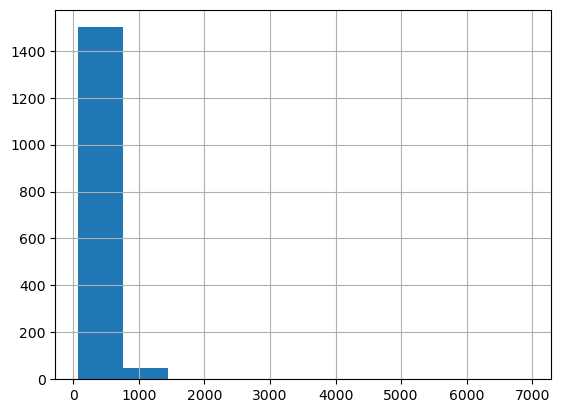

In [9]:
df['price'].hist() #plotting the histogram 

In [10]:
df['price'].skew()

13.308535685785836

Findings: The variable 'Price' has a mean of 288.391667 and a standard deviation of 321.180435. There are 1555 rows in the data set and the minimum price is 69.588289 and the maximum price is 6943.700980. The median of the price is 208.532129. From the above histogram, we know that the data is not normally distributed and it is right skewed(Positive skew) with value of 13.31. We also notice the variable contains outliers and the outliers needs to be removed for the further analysis.

4.2 We decide to remove the price outliers (defined as three standard deviation away from the mean) and repeat the graph. What do you find?

In [11]:
# df['price'].std() #calculating the standard deviation
# out_up = df['price'].mean() + 3 * df['price'].std() #calculating the third standard deviation to remove the outliers
# normal_price = df[df['price']<out_up] #removing the outliers
# normal_price #data after removing outliers
# normal_price.shape #shape of the data aftering removing outliers
# normal_price['price'].hist() #plotting the histogram after removing outliers

In [12]:
#defining the function to remove outliers for any column that you pass
def remove_outliers (df, column):
    out_up = df[column].mean() + 3 * df[column].std()
    df_1 = df[df[column]<out_up]
    return df_1

In [13]:
df_1 = remove_outliers(df,'price') #calling the function to remove outliers for column 'price'

In [14]:
df_1

,price,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index,lng,lat
0,474.317499,1,False,False,4,False,0,1,10,91,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624
1,169.897829,1,False,True,2,True,1,0,10,88,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714
2,161.984779,1,False,True,4,False,0,1,9,88,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859
3,367.956804,1,False,False,3,False,0,1,10,91,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390
4,196.895292,1,False,True,3,False,1,0,9,91,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,300.928620,1,False,True,2,False,0,0,10,100,2.394839,0.954952,9.709902,12.430326,2.19590,41.39637
1550,769.660437,3,False,False,6,False,0,1,8,84,2.503374,0.554007,9.075307,14.946029,2.19991,41.38834
1551,318.151139,1,False,True,2,True,1,0,9,98,2.619616,0.761843,8.747713,12.276081,2.20066,41.39204
1552,248.562851,1,False,True,2,True,1,0,10,98,2.700091,0.866258,8.538490,11.868058,2.20140,41.39286


<Axes: >

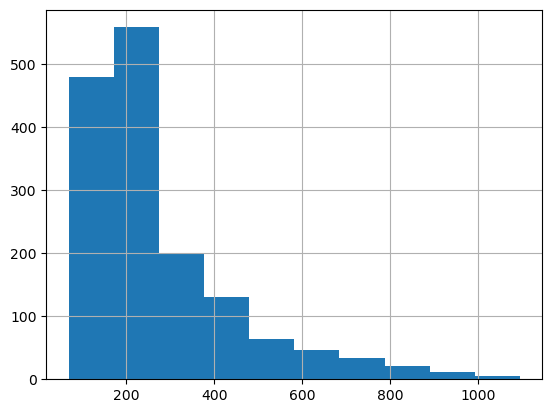

In [15]:
df_1['price'].hist()

In [16]:
df_1['price'].skew()

1.8182640666147285

Findings: The above histogram is plotted after removing the outliers and the distribution is still right skewed, but the skewness is reduced from 13.31 to 1.82. Since the distribution is positively skewed, we can see most of the data points falls on the left side of the mean.

5. How many superhosts are there? Create a graph to display as well.

In [17]:
df_1['superhost'].value_counts()

False    1269
True      279
Name: superhost, dtype: int64

C:\Users\siris\AppData\Local\Temp\ipykernel_22376\2371285630.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Axes: xlabel='superhost', ylabel='count'>

Text(0.5, 1.0, 'Counts of Superhosts and Non-superhosts')

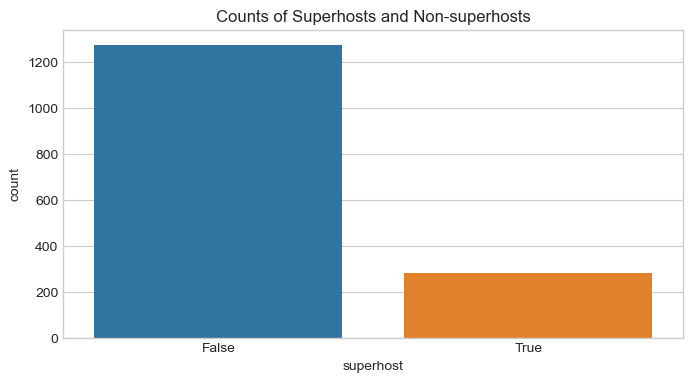

In [18]:
#plotting the graph for superhost
plt.style.use('seaborn-whitegrid')
fig=plt.figure(figsize=(8,4))
sns.countplot(x='superhost',data=df)
plt.title("Counts of Superhosts and Non-superhosts")

Findings: There are 279 hosts with the superhost status and 1269 hosts without the superhost status.

6. Is there possible correlation between the distance to the closest metro station and price?

In [19]:
#to find the correlation between two variables
df_1['metro_dist'].corr(df_1['price']) 

-0.039420166571084575

<Axes: xlabel='metro_dist', ylabel='price'>

Text(0.5, 1.0, 'Correlation between metro_dist and price')

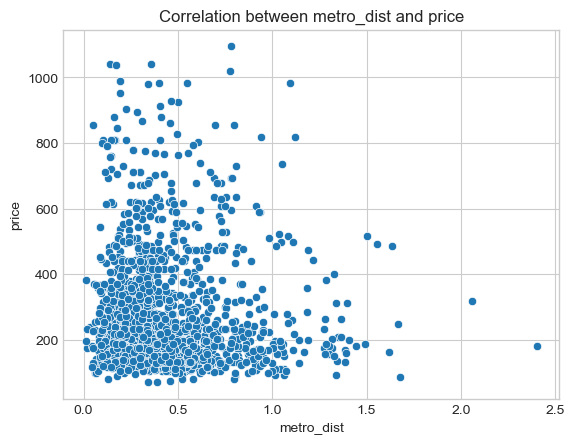

In [20]:
sns.scatterplot(x='metro_dist', y='price', data=df_1)
plt.title('Correlation between metro_dist and price')

Findings: Correlation determines the strength of the relationship between two variables and the range of correlation is -1 to +1. Since the correlation between the distance to the closest metro station and price is -0.04, there is a very low negative correlation between these two variables.

7. Run a linear regression model with the dataset. 'price' is the target variable and all other features (except longitude and latitude) as predictor variables. Follow the steps we have practiced in class. Display the results.<br>
    Hint: You need to turn True/False Boolean variables (room_private, room_shared, and superhost) into 1/0 before applying statsmodels models. You can use .astype(int). Remember to save the changes by assigning the changed outcome back to the variable, such as <i>car['price'] = car['price']/1000</i>.

In [21]:
df_1['room_private'] = df_1['room_private'].astype(int)
df_1['room_shared'] = df_1['room_shared'].astype(int)
df_1['superhost'] = df_1['superhost'].astype(int)

C:\Users\siris\AppData\Local\Temp\ipykernel_22376\183193052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['room_private'] = df_1['room_private'].astype(int)
C:\Users\siris\AppData\Local\Temp\ipykernel_22376\183193052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['room_shared'] = df_1['room_shared'].astype(int)
C:\Users\siris\AppData\Local\Temp\ipykernel_22376\183193052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [22]:
df_1.dtypes

price                 float64
bedrooms                int64
room_shared             int32
room_private            int32
person_capacity         int64
superhost               int32
multi                   int64
biz                     int64
cleanliness             int64
guest_satisfaction      int64
dist                  float64
metro_dist            float64
attr_index            float64
rest_index            float64
lng                   float64
lat                   float64
dtype: object

In [23]:
df_1.head()

,price,bedrooms,room_shared,room_private,person_capacity,superhost,multi,biz,cleanliness,guest_satisfaction,dist,metro_dist,attr_index,rest_index,lng,lat
0,474.317499,1,0,0,4,0,0,1,10,91,1.111996,0.630491,17.942927,20.154890,2.17556,41.39624
1,169.897829,1,0,1,2,1,1,0,10,88,1.751839,0.124017,10.910462,17.484489,2.14906,41.38714
2,161.984779,1,0,1,4,0,0,1,9,88,1.670493,0.080322,11.726595,18.505814,2.15357,41.37859
3,367.956804,1,0,0,3,0,0,1,10,91,1.475847,0.093107,13.634603,20.837357,2.16839,41.37390
4,196.895292,1,0,1,3,0,1,0,9,91,1.855452,0.272486,11.793678,17.440874,2.15238,41.37699


In [24]:
x = df_1.iloc[:, 1:14]
y = df_1['price']

X_with_intercept = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, X_with_intercept)
results = model.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     266.7
Date:                Tue, 20 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:27:52   Log-Likelihood:                -9274.5
No. Observations:                1548   AIC:                         1.858e+04
Df Residuals:                    1534   BIC:                         1.865e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 96.4191     35.751      2.697      0.007      26.294     166.545
bedrooms              38.0055      6.858      5.542      0.000      24.553      51.458
room_shared         -270.6826     35.552     -7.614      0.000    -340.418    -200.947
room_private        -169.8302      9.195    -18.470      0.000    -187.866    -151.794
person_capacity       47.5661      3.574     13.310      0.000      40.556      54.576
superhost             15.5403      6.797      2.286      0.022       2.207      28.873
multi                 -3.8143      6.241     -0.611      0.541     -16.056       8.428
biz                   19.1618      7.005      2.736      0.006       5.422      32.901
cleanliness           -2.7610      3.567     -0.774      0.439      -9.757       4.235
guest_satisfaction     1.5329      0.425      3.609      0.000       0.700       2.366
dist                 -10.6433      3.450     -3.085      0.002     -17.411      -3.876
metro_dist            23.3560     10.040      2.326      0.020       3.662      43.051
attr_index             0.6253      0.387      1.614      0.107      -0.135       1.385
rest_index             0.6377      0.479      1.332      0.183      -0.301       1.577
==============================================================================
Omnibus:                      561.132   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3437.329
Skew:                           1.562   Prob(JB):                         0.00
Kurtosis:                       9.598   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Findings: After performing the OLS model on the data set, the R-squared value is 0.693 and the Adj. R-squared value is 0.691. Since multiple independent variables are used in the model, we will consider the Adj. R-squared value which indicates that 69.1% of variation in the price variable is explained by the model.

8. Which variables are important to predict the prices? Which are not?

In [30]:
p_values_list = results.pvalues.reset_index() #extracting the p_value

In [31]:
p_values_list.columns = ['variables','p_value']

In [36]:
significant_variables = p_values_list[p_values_list['p_value'] < 0.05]['variables'].tolist() #checking the p_value with significance level=0.05 

In [39]:
significant_variables = significant_variables[1:]

In [40]:
significant_variables

['bedrooms',
 'room_shared',
 'room_private',
 'person_capacity',
 'superhost',
 'biz',
 'guest_satisfaction',
 'dist',
 'metro_dist']

In [41]:
insignificant_variables = p_values_list[p_values_list['p_value'] > 0.05]['variables'].tolist()

In [42]:
insignificant_variables

['multi', 'cleanliness', 'attr_index', 'rest_index']

To consider which predictors are important in predicting the price, we have to look at the p-values of the independent variables. If the p-value of the independent variable is less that 0.05 (5%), then the variable is significant for predicting the price.

From the above model results, the variables that are important for predicting the price are:
bedrooms, room_shared, room_private, person_capacity, superhost, biz, guest_satisfaction, dist and metro_dist

The variables that are not important for predicting the price are:
multi, cleanliness, attr_index  and rest_index.

9. Interpret the impact of metro_dist on the price.

Interpretation: As the distance to the closest metro station increases by 1 kilometre, the price of the Airbnb is increased by 23.3560.

10. Interpret the impact of being a superhost.

A host with superhost status are predicted to have 15.5403 higher price than a host without superhost status, holding all other factors in the model constant.